In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_abdelrahman_421.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-2.243935,2.550871,2.032072,2.312733,2.495381,-2.015855,-2.782430,-2.049310,-3.481700,2.673452,...,-0.727810,-1.053711,-0.386837,-0.980420,-0.452154,-0.889178,0.671255,-0.738662,0.034525,left_direction
1,-1.277153,1.495662,-2.138885,-10.202680,-0.484311,-7.528879,-0.116221,2.066432,-1.576117,-2.465452,...,-0.019083,-0.313770,0.306484,-0.557615,-0.148078,0.413368,-0.035074,1.202171,-0.918141,left_direction
2,-6.349087,-2.300355,-2.384682,-2.294762,-2.096504,-2.240967,-2.514789,-2.244805,-11.830352,-1.667767,...,2.259654,0.121554,0.545948,0.410117,0.244746,-1.715861,-0.092757,0.143942,-0.454237,left_direction
3,1.990698,1.453380,1.184191,2.163813,1.453787,1.570639,-2.143178,-2.804646,1.012921,2.173443,...,0.103073,-0.899294,-1.274150,0.321824,0.076712,-1.298794,0.171077,0.359508,-0.810352,left_direction
4,-2.933474,-2.285598,-2.454412,-6.416972,-5.575771,2.691805,2.553256,-1.204703,1.032613,0.778354,...,-0.437553,-0.902032,-0.525186,0.041142,-0.171711,-1.038864,0.015293,-0.306541,-0.838667,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


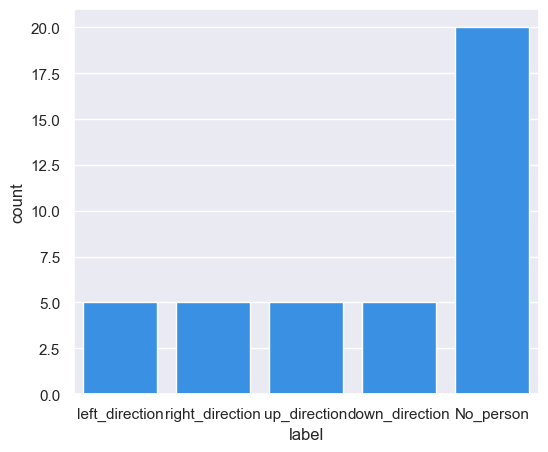

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-2.243935,2.550871,2.032072,2.312733,2.495381,-2.015855,-2.782430,-2.049310,-3.481700,2.673452,...,-0.727810,-1.053711,-0.386837,-0.980420,-0.452154,-0.889178,0.671255,-0.738662,0.034525,2
1,-1.277153,1.495662,-2.138885,-10.202680,-0.484311,-7.528879,-0.116221,2.066432,-1.576117,-2.465452,...,-0.019083,-0.313770,0.306484,-0.557615,-0.148078,0.413368,-0.035074,1.202171,-0.918141,2
2,-6.349087,-2.300355,-2.384682,-2.294762,-2.096504,-2.240967,-2.514789,-2.244805,-11.830352,-1.667767,...,2.259654,0.121554,0.545948,0.410117,0.244746,-1.715861,-0.092757,0.143942,-0.454237,2
3,1.990698,1.453380,1.184191,2.163813,1.453787,1.570639,-2.143178,-2.804646,1.012921,2.173443,...,0.103073,-0.899294,-1.274150,0.321824,0.076712,-1.298794,0.171077,0.359508,-0.810352,2
4,-2.933474,-2.285598,-2.454412,-6.416972,-5.575771,2.691805,2.553256,-1.204703,1.032613,0.778354,...,-0.437553,-0.902032,-0.525186,0.041142,-0.171711,-1.038864,0.015293,-0.306541,-0.838667,2
5,-0.097606,0.911700,-0.475736,-2.249891,1.276679,-5.961636,-2.617542,-2.068980,-2.207128,-1.439531,...,-0.855500,-2.338059,-1.120550,-1.297010,-0.747434,-1.197328,-0.108861,0.943381,-0.953920,3
6,-1.592386,-2.010743,2.076678,-1.969783,-1.314047,-1.387668,3.380918,-1.887770,-2.711970,-1.852910,...,-0.139436,-1.134306,-0.402953,-0.349224,-0.602560,1.110103,-0.766720,0.476416,-0.317002,3
7,-1.753667,1.276597,-1.685578,-6.359039,-4.912791,-1.807530,-3.982215,-5.292696,2.585336,-1.803847,...,0.490408,0.781227,-0.057287,-0.733516,-0.022707,-1.013950,-1.824869,-0.349799,-0.192005,3
8,-4.666171,-1.797755,-2.400174,-4.987619,-2.016038,-1.780066,-1.214777,-2.005633,-1.997534,-1.065524,...,-2.027727,-3.490561,-2.122534,-2.617936,2.505812,-2.540039,-2.939032,-2.502131,-1.698132,3
9,2.036416,0.139351,2.514608,-1.654185,2.145920,-0.521697,1.983833,-2.389835,-1.803498,-4.707765,...,-0.648840,-1.501595,-2.163840,-0.935924,-0.714452,-1.619119,0.877911,-1.399613,-0.904672,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    4
11    4
12    4
13    4
14    4
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123)

In [12]:
X_train.shape

(32, 1600)

In [13]:
X_test.shape

(8, 1600)

 2      3     4    1    0:
left   right  up  down  No

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.25


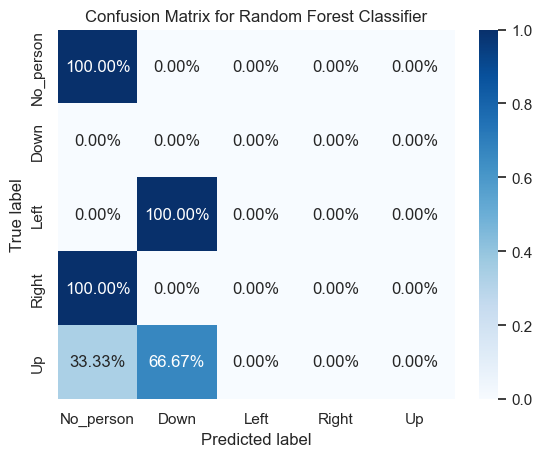

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.25
Recall:  0.25
F1 score:  0.25
Accuracy:  0.25


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3

    accuracy                           0.25         8
   macro avg       0.08      0.20      0.11         8
weighted avg       0.10      0.25      0.14         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

Text(0.5, 1.0, 'Random Forest')

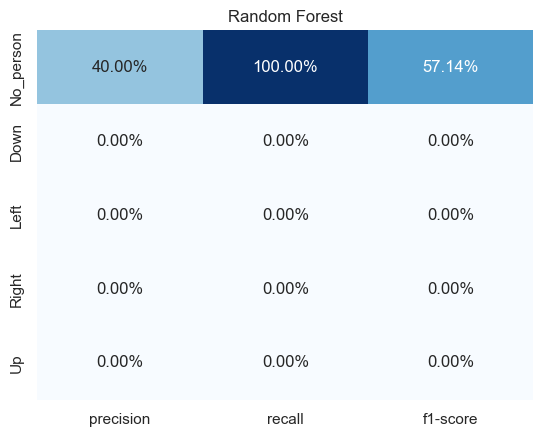

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.25


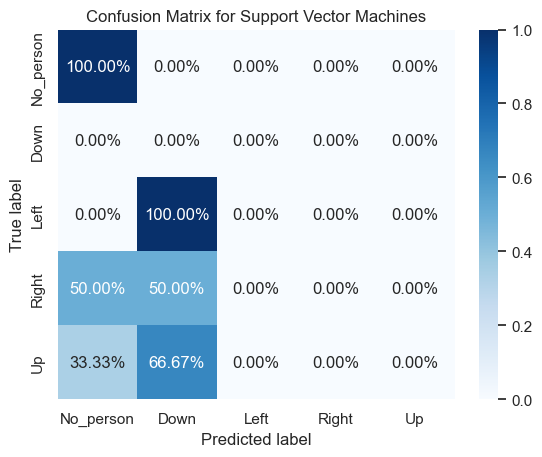

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.25
Recall:  0.25
F1 score:  0.25
Accuracy:  0.25


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3

    accuracy                           0.25         8
   macro avg       0.10      0.20      0.13         8
weighted avg       0.12      0.25      0.17         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

Text(0.5, 1.0, 'Support Vector Machines')

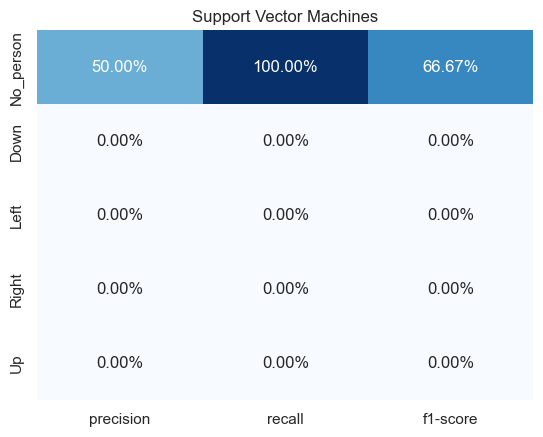

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.25


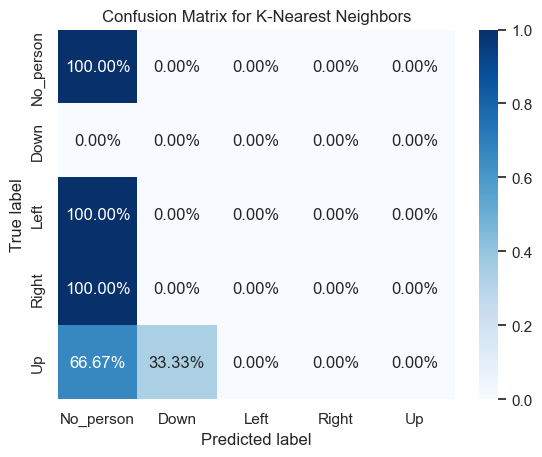

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.25
Recall:  0.25
F1 score:  0.25
Accuracy:  0.25


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3

    accuracy                           0.25         8
   macro avg       0.06      0.20      0.09         8
weighted avg       0.07      0.25      0.11         8



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_cla

Text(0.5, 1.0, 'K-Nearest Neighbors')

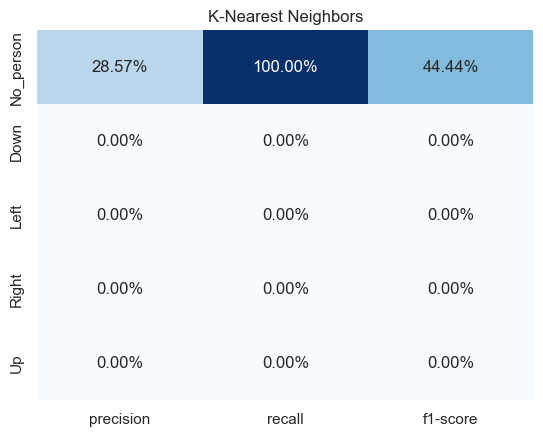

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])

In [32]:
df_accuracy = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy

,RF,SVM,KNN
0,0.25,0.25,0.25


In [33]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')